<a href="https://colab.research.google.com/github/SatwikIITD/summer-of-code-2024/blob/main/DSOC_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install -q kaggle

In [5]:
 ! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 91% 161M/178M [00:01<00:00, 150MB/s]
100% 178M/178M [00:01<00:00, 131MB/s]


In [10]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [11]:
import pandas

In [44]:
df=pandas.read_csv("PS_20174392719_1491204439457_log.csv")

In [45]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [46]:
one_hot=pandas.get_dummies(df["type"])
df=df.drop("type",axis=1)
df=df.join(one_hot)

In [47]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [48]:
df=df.drop("nameOrig",axis=1)

In [49]:
df["nameDestfirst"]=df["nameDest"].str[:1]
df=df.drop("nameDest",axis=1)

In [50]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDestfirst
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C


In [51]:
one_hot=pandas.get_dummies(df["nameDestfirst"])
df=df.drop("nameDestfirst",axis=1)
df=df.join(one_hot)

In [52]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


In [53]:
df=df.drop("M",axis=1)

In [54]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True


In [55]:
def norm_col(col,df):
  df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())

In [56]:
col_list=["step",	"amount",	"oldbalanceOrg", "newbalanceOrig",	"oldbalanceDest",	"newbalanceDest"]
for col in col_list:
  norm_col(col,df)

In [57]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


In [29]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [30]:
y=df["isFraud"]
X=df.drop("isFraud",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

LogisticRegression(random_state=0, solver='liblinear')

In [72]:
model.classes_

array([0, 1])

In [73]:
model.intercept_

array([-15.38445544])

In [74]:
model.coef_

array([[ 3.62351134e+00,  7.10550099e+00,  1.91177678e+02,
        -1.21648867e+02, -3.14910671e+01, -5.43443851e+01,
         5.58679391e+00, -1.63049507e+01,  7.54830750e+00,
        -2.14956526e-01, -1.53728162e+01,  8.95995974e+00,
        -1.16397879e-02]])

In [75]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
model.predict_proba(X_test)

array([[1.00000000e+00, 2.67030013e-13],
       [1.00000000e+00, 3.47405016e-14],
       [9.99643335e-01, 3.56664821e-04],
       ...,
       [9.95442023e-01, 4.55797719e-03],
       [9.96966151e-01, 3.03384882e-03],
       [9.98059184e-01, 1.94081571e-03]])

In [77]:
model.score(X_test,y_test)

0.9990059126586217

In [78]:
confusion_matrix(y_test,model.predict(X_test))

array([[1270851,       7],
       [   1258,     408]])

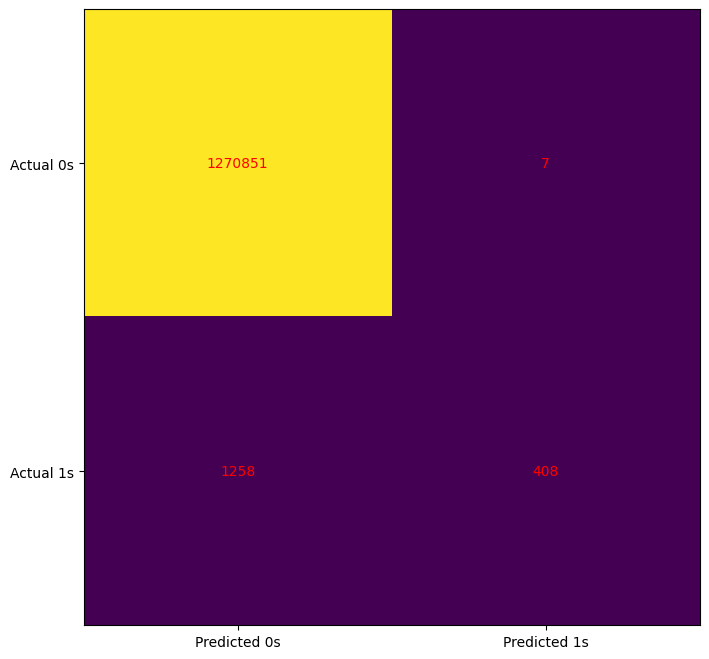

In [79]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [69]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270858
           1       0.95      0.09      0.17      1666

    accuracy                           1.00   1272524
   macro avg       0.97      0.55      0.58   1272524
weighted avg       1.00      1.00      1.00   1272524



In [81]:
! pip install --user xgboost

# CPU only

! conda install -c conda-forge py-xgboost-cpu

/bin/bash: line 1: conda: command not found


In [82]:
!pip install --upgrade xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform

In [83]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

In [84]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [85]:
import xgboost as xgb

# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
xgb_classifier.fit(X_train, y_train)

# Convert the model to a native API model
model = xgb_classifier.get_booster()

In [87]:
# Train the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [88]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

In [89]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.96%


In [90]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [93]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 6547, number of negative: 5083549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.761723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001286 -> initscore=-6.654758
[LightGBM] [Info] Start training from score -6.654758


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [95]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9991
Testing accuracy 0.9991


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

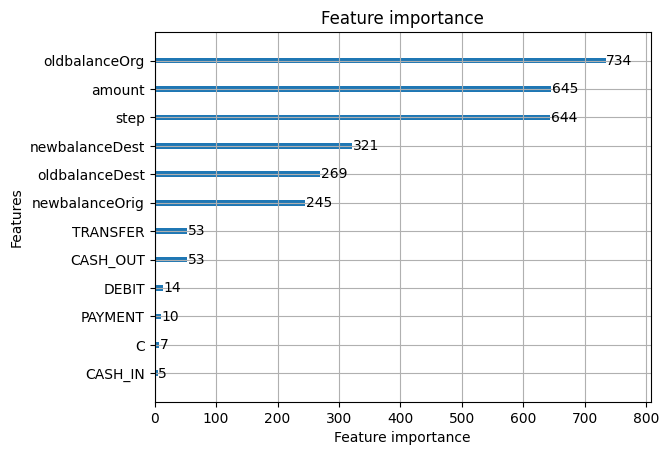

In [96]:
lgb.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

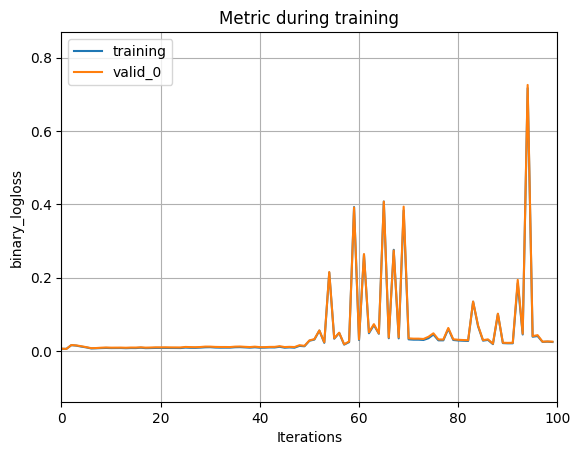

In [97]:
lgb.plot_metric(model)

<Axes: >

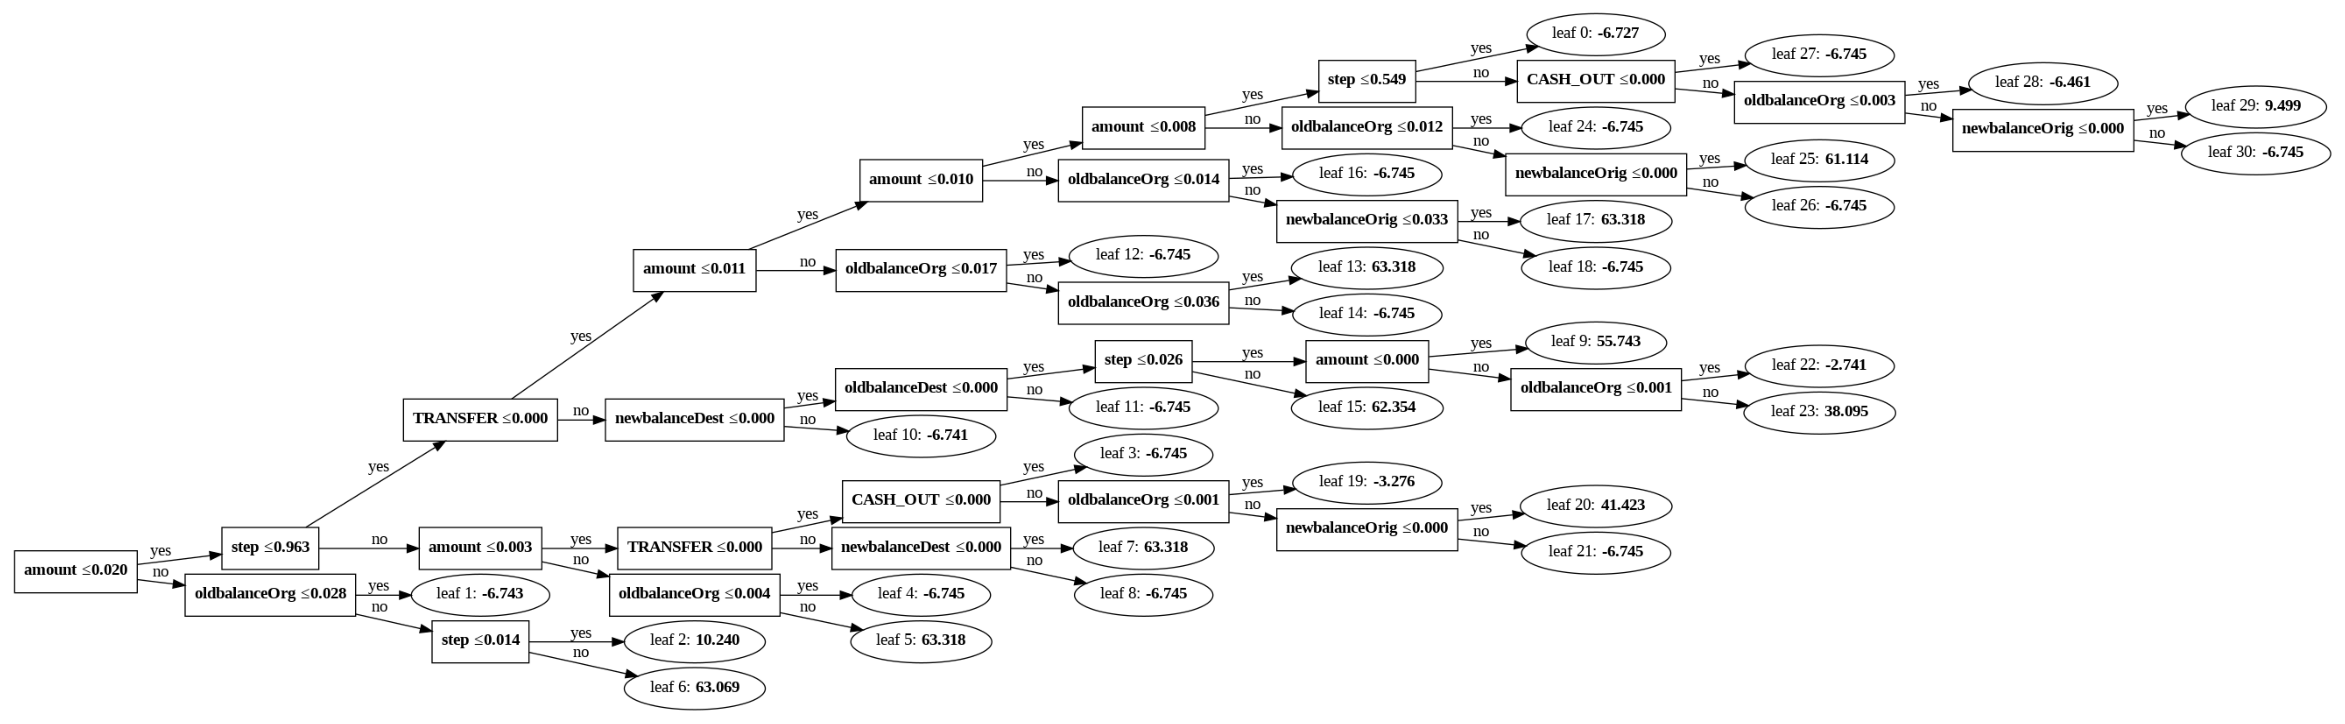

In [98]:
lgb.plot_tree(model,figsize=(30,40))

In [100]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270858
           1       0.67      0.62      0.65      1666

    accuracy                           1.00   1272524
   macro avg       0.84      0.81      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

In [1]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/__init__.py)

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Define PCA with randomized solver
pca = PCA(n_components=12, whiten=True, svd_solver='randomized', random_state=42)

# Define SVC with RBF kernel and balanced class weights
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline combining PCA and SVC
model = make_pipeline(pca, svc)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Define PCA with randomized solver
pca = PCA(n_components=3, whiten=True, svd_solver='randomized', random_state=42)

# Define SVC with RBF kernel and balanced class weights
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline combining PCA and SVC
model = make_pipeline(pca, svc)

# Define the parameter grid
param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# Initialize GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search
grid.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid.best_params_)


Best parameters: {'svc__C': 50, 'svc__gamma': 0.005}


In [11]:
model = grid.best_estimator_
yfit = model.predict(X_test)